In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [45]:
data = pd.read_csv('winequality.csv',index_col = 'ID')

In [46]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
ID,,,,,,,,,,,,
W0001,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,2
W0002,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,NaN,9.5,2
W0003,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,NaN,10.1,2
W0004,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,2
W0005,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,2


In [47]:
data.shape

(4898, 12)

In [48]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [49]:
X = data.drop('quality', axis = 1)
y = data['quality']

In [50]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
ID,,,,,,,,,,,
W0001,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
W0002,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,NaN,9.5
W0003,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,NaN,10.1
W0004,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
W0005,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


In [51]:
X.isnull().sum()

fixed acidity             0
volatile acidity          0
citric acid             733
residual sugar            0
chlorides                 0
free sulfur dioxide       0
total sulfur dioxide      0
density                   0
pH                      844
sulphates               723
alcohol                   0
dtype: int64

In [52]:
X.fillna(X.median(), inplace = True)

In [53]:
X.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64

In [54]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , random_state = 1)

In [55]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore') 

In [56]:
gnb = GaussianNB()
gnb.fit(X_train , y_train)
from sklearn.metrics import accuracy_score , classification_report
y_pred = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.6955102040816327
              precision    recall  f1-score   support

           1       0.54      0.52      0.53       407
           2       0.77      0.78      0.77       818

   micro avg       0.70      0.70      0.70      1225
   macro avg       0.65      0.65      0.65      1225
weighted avg       0.69      0.70      0.69      1225



In [57]:
y.value_counts()

2    3258
1    1640
Name: quality, dtype: int64

In [58]:
from sklearn.utils import resample

data_majority = data[data['quality']==2]
data_minority = data[data['quality']==1]

data_minority_upsampled = resample(data_minority,
                                   replace = True,
                                   n_samples = 3258,
                                   random_state = 1)
data_upsampled = pd.concat([data_majority,data_minority_upsampled])
data_upsampled['quality'].value_counts()

2    3258
1    3258
Name: quality, dtype: int64

In [59]:
train,test = train_test_split(data_upsampled , test_size = 0.25)


train_y_upsampled = train['quality']
test_y_upsampled = test['quality']
train_x_upsampled = train
train_x_upsampled.pop('quality')
test_x_upsampled = test
test_x_upsampled.pop('quality')

ID
W2364    1
W4835    2
W1285    2
W1218    1
W4595    2
W1940    1
W2222    2
W1042    1
W4511    2
W1419    1
W2512    2
W1054    1
W0895    2
W2674    2
W4791    2
W4455    2
W0117    2
W1349    2
W0946    2
W1905    2
W2224    2
W0121    1
W3412    2
W4239    1
W1609    1
W2652    1
W2586    2
W0063    1
W3303    2
W0183    1
        ..
W3276    1
W0990    2
W3284    2
W0378    2
W2776    2
W4636    2
W3495    2
W2102    2
W2653    2
W4472    2
W1255    1
W0329    2
W4831    2
W4821    1
W3752    1
W1332    2
W0997    1
W0567    2
W1725    2
W2264    1
W2083    2
W1951    1
W1945    1
W3431    2
W3440    1
W3408    1
W3343    1
W2066    1
W2421    2
W0236    2
Name: quality, Length: 1629, dtype: int64

In [60]:
train_x_upsampled.fillna(X.median(), inplace = True)
print(train_x_upsampled.isnull().sum())

test_x_upsampled.fillna(X.median(), inplace = True)
print(test_x_upsampled.isnull().sum())



fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64


# Naive Bayes

In [65]:
gnb_balanced = GaussianNB()
gnb_balanced.fit(X=train_x_upsampled , y = train_y_upsampled)
test_y_pred_balanced = gnb_balanced.predict(test_x_upsampled)
# print('Accuracy of naive bayes classifier on test set : {:.2f}'.
#      format(gnb_balanced.score(test_x_upsampled,test_y_upsampled)))
acc_gnb_bal = gnb_balanced.score(test_x_upsampled,test_y_upsampled)
print (acc_gnb_bal)
print(classification_report(test_y_upsampled,test_y_pred_balanced))

0.6949048496009822
              precision    recall  f1-score   support

           1       0.71      0.69      0.70       829
           2       0.68      0.70      0.69       800

   micro avg       0.69      0.69      0.69      1629
   macro avg       0.70      0.70      0.69      1629
weighted avg       0.70      0.69      0.69      1629



# Logistic Regression


In [62]:
logisticRegr_balanced = LogisticRegression()
logisticRegr_balanced.fit(X = train_x_upsampled , y = train_y_upsampled)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [66]:
test_y_pred_balanced = logisticRegr_balanced.predict(test_x_upsampled)
#print('Accuracy of logistic regression classifier on test set : {:.2f}'.
     #format(logisticRegr_balanced.score(test_x_upsampled,test_y_upsampled)))
acc_logreg_bal = logisticRegr_balanced.score(test_x_upsampled,test_y_upsampled)
print (acc_logreg_bal)
print(classification_report(test_y_upsampled,test_y_pred_balanced))

0.7335788827501535
              precision    recall  f1-score   support

           1       0.73      0.76      0.74       829
           2       0.74      0.71      0.72       800

   micro avg       0.73      0.73      0.73      1629
   macro avg       0.73      0.73      0.73      1629
weighted avg       0.73      0.73      0.73      1629



In [67]:
print(classification_report(test_y_upsampled,test_y_pred_balanced))

              precision    recall  f1-score   support

           1       0.73      0.76      0.74       829
           2       0.74      0.71      0.72       800

   micro avg       0.73      0.73      0.73      1629
   macro avg       0.73      0.73      0.73      1629
weighted avg       0.73      0.73      0.73      1629



# KNN

In [79]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score 
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X = train_x_upsampled , y = train_y_upsampled)
test_y_pred_balanced = knn.predict(test_x_upsampled)
knn_acc = accuracy_score(test_y_upsampled,test_y_pred_balanced)
print(knn_acc)


0.6881522406384285


# Decison Tree

In [84]:
from sklearn import tree
model = tree.DecisionTreeClassifier(max_depth = 12 , max_leaf_nodes = 10)
model.fit(X = train_x_upsampled,y = train_y_upsampled)
test_y_pred_balanced = model.predict(test_x_upsampled)
from sklearn.metrics import accuracy_score

decision_tree_acc = accuracy_score(test_y_upsampled , test_y_pred_balanced)
print(classification_report(test_y_upsampled , test_y_pred_balanced))
print(decision_tree_acc)

              precision    recall  f1-score   support

           1       0.72      0.79      0.76       829
           2       0.76      0.69      0.72       800

   micro avg       0.74      0.74      0.74      1629
   macro avg       0.74      0.74      0.74      1629
weighted avg       0.74      0.74      0.74      1629

0.7391037446286065


# Random Forest

In [82]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(criterion = 'gini',
                              n_estimators = 25,
                              random_state = 1)
model.fit(X=train_x_upsampled ,y= train_y_upsampled)
test_y_pred_balanced = model.predict(test_x_upsampled)

random_forest_acc = accuracy_score(test_y_upsampled , test_y_pred_balanced)
print(random_forest_acc)

0.9042357274401474


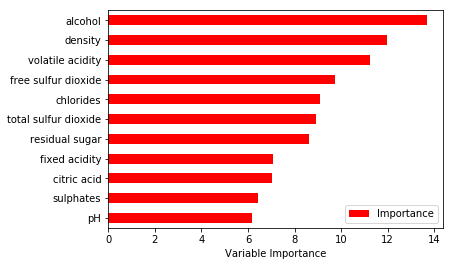

In [77]:
Importance = pd.DataFrame({'Importance':model.feature_importances_*100},index = train_x_upsampled.columns)
Importance.sort_values('Importance' , axis = 0 ,ascending = True).plot(kind ='barh' , color = 'r')
plt.xlabel('Variable Importance')
plt.gca().Legend_ = None 

In [85]:
print("Naive Bayes",acc_gnb_bal)
print("Logistic Regression",acc_logreg_bal)
print("KNN",knn_acc)
print("Decision Tree",decision_tree_acc)
print("Random Forest",random_forest_acc )

Naive Bayes 0.6949048496009822
Logistic Regression 0.7335788827501535
KNN 0.6881522406384285
Decision Tree 0.7391037446286065
Random Forest 0.9042357274401474
